# **ANN Linear Regression On Admission Predictions**

In [85]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow
from keras.layers import Dense
from keras.models import Sequential

# **1** .**Preprocessing**

In [86]:
# Load Data 
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [87]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [88]:
# Shape
df.shape

(500, 9)

In [89]:
# Null Values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [90]:
# Duplicated 
df.duplicated().sum()

0

In [91]:
# Drop Irrelevent column
df.drop(columns='Serial No.',inplace=True)

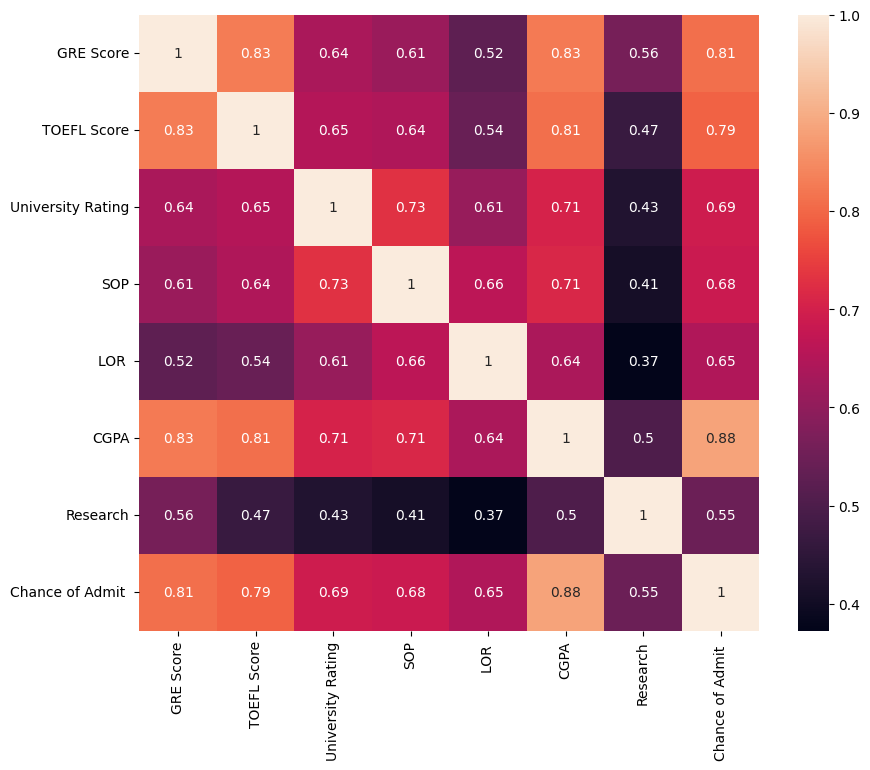

In [92]:
#Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

- **Distribution**

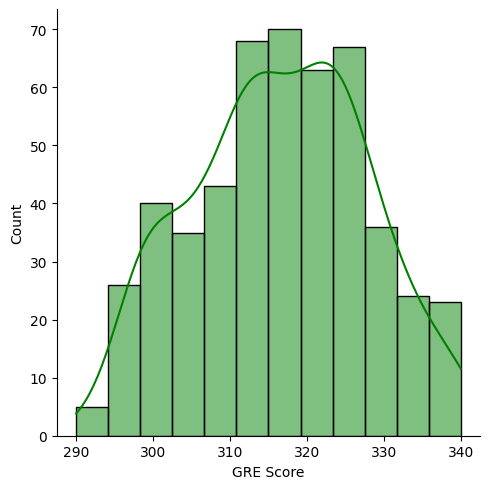

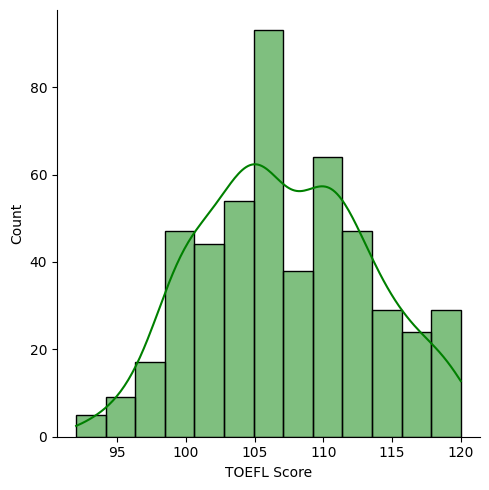

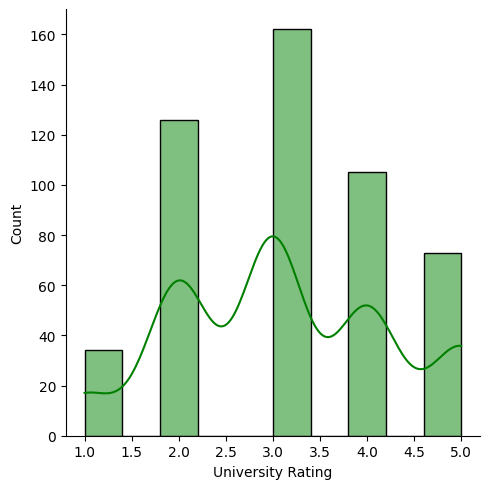

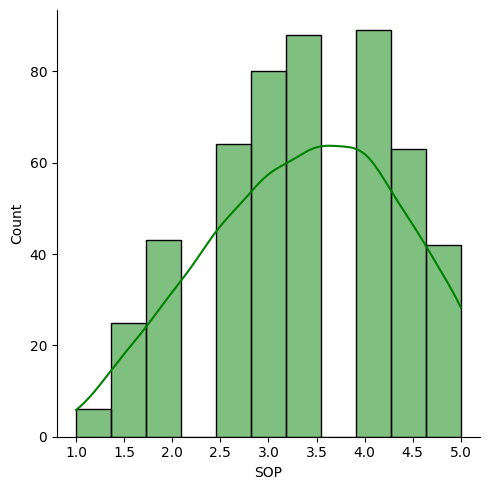

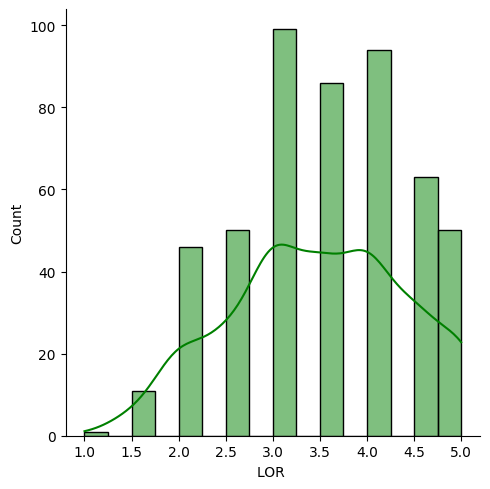

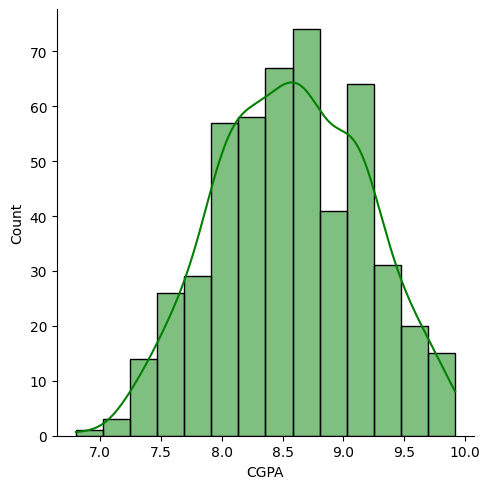

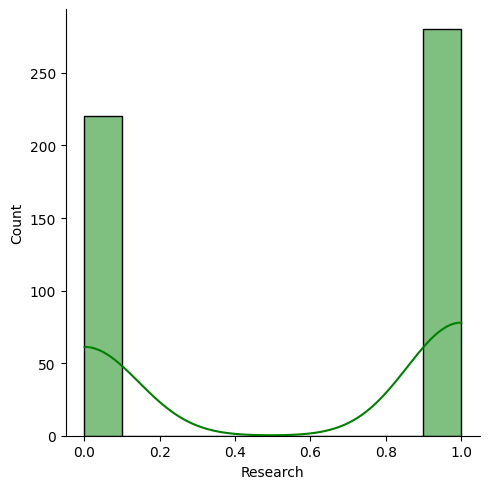

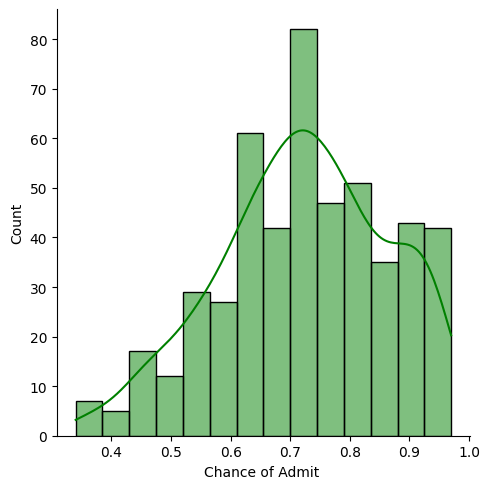

In [97]:
# Plot Numerical Columns Distribution 
for col in df.columns:
    if df[col].dtype != 'object':
        sns.displot(df[col],kde=True , color='green')
        plt.show()

# **2. ANN Linear Model**

- **TrainTest Split**

In [79]:
# X and y 
X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']

# Train Test Split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scale data 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
#Xtrain Shape 
X_train.shape

(400, 7)

- **Build Model**

In [81]:
#Sequntial Model 
model = Sequential()

#imput layer 
model.add(Dense(10,activation='relu',input_dim=7))
#Hidden layer
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
#output Layer 
model.add(Dense(1,activation='linear'))

#Compile
model.compile(optimizer='adam',loss='mean_squared_error')

#Fit 
histroy = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 23ms/step - loss: 0.9700 - val_loss: 0.8956
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.7303 - val_loss: 0.6793
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5929 - val_loss: 0.5809
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5298 - val_loss: 0.5267
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4850 - val_loss: 0.4832
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4493 - val_loss: 0.4527
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4196 - val_loss: 0.4204
Epoch 8/100
10/10 [==============================] - 0s 10ms/step - loss: 0.3874 - val_loss: 0.3845
Epoch 9/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3468 - val_loss: 0.3238
Epoch 10/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2671 - val_loss: 0.2201
Epoch 1

In [82]:
# predict 
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [83]:
# Evaluate R2 
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7891888273679102

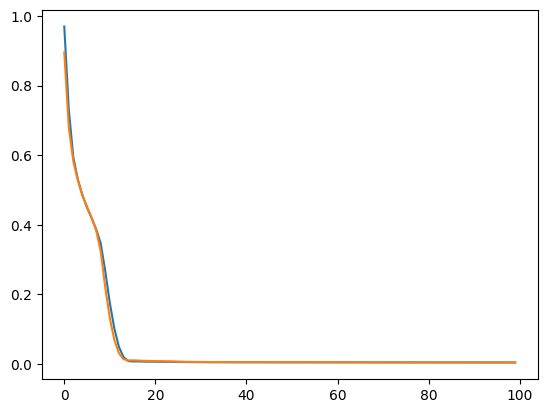

In [84]:
# Plotting Loss  and Val_loss
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])